### Context
+ An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

### Content
+ The dataset used for model building contained 10999 observations of 12 variables. The data contains the following information:-

+ ID: ID Number of Customers.
+ Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
+ Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
+ Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
+ Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
+ Cost of the product: Cost of the Product in US Dollars.
+ Prior purchases: The Number of Prior Purchase.
+ Product importance: The company has categorized the product in the various parameter such as low, medium, high.
+ Gender: Male and Female.
+ Discount offered: Discount offered on that specific product.
+ Weight in gms: It is the weight in grams.
+ Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [1]:
## Importing some basic modules for exploring and visualizing the dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing libraries for splitting and scaling the data.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing machine learning libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Colleecting the data.

collected_dataset = 'C:/Users/ARNAB PRIYANKA/Downloads/Analytics EDU/Projects/Data/Train.csv'

In [3]:
# Loading the data.

df = pd.read_csv(collected_dataset)

In [4]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Exploratory Data Analysis and Data Visualization

In [5]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
df.shape

(10999, 12)

In [7]:
df.nunique().sort_values(ascending = True)

Gender                     2
Reached.on.Time_Y.N        2
Mode_of_Shipment           3
Product_importance         3
Warehouse_block            5
Customer_rating            5
Customer_care_calls        6
Prior_purchases            8
Discount_offered          65
Cost_of_the_Product      215
Weight_in_gms           4034
ID                     10999
dtype: int64

In [8]:
df['Warehouse_block'].value_counts()

F    3666
D    1834
C    1833
B    1833
A    1833
Name: Warehouse_block, dtype: int64

In [9]:
df['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [10]:
df['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [11]:
df['Gender'].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

In [12]:
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [13]:
df['Customer_care_calls'].value_counts()

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

In [14]:
df['Customer_rating'].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

In [15]:
df['Prior_purchases'].value_counts()

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [17]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

### Checking Missing values

In [18]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [19]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [20]:
df = df.drop(columns = 'ID')
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


+ Data Visualization: Here, I am using Seaborn library for Data visualization. Seaborn is an amazing visualization library for statistical graphics plotting in Python. It provides beautiful default styles and color palettes to make statistical plots more attractive using Python. It is built on the top of matplotlib library and also closely integrated into the data structures from pandas. Notice how we provided only the names of the variables and their roles in the plot. Unlike when using matplotlib directly, it wasn’t necessary to specify attributes of the plot elements in terms of the color values or marker codes. Behind the scenes, seaborn handled the translation from values in the dataframe to arguments that matplotlib understands. This declarative approach lets you stay focused on the questions that you want to answer, rather than on the details of how to control matplotlib.

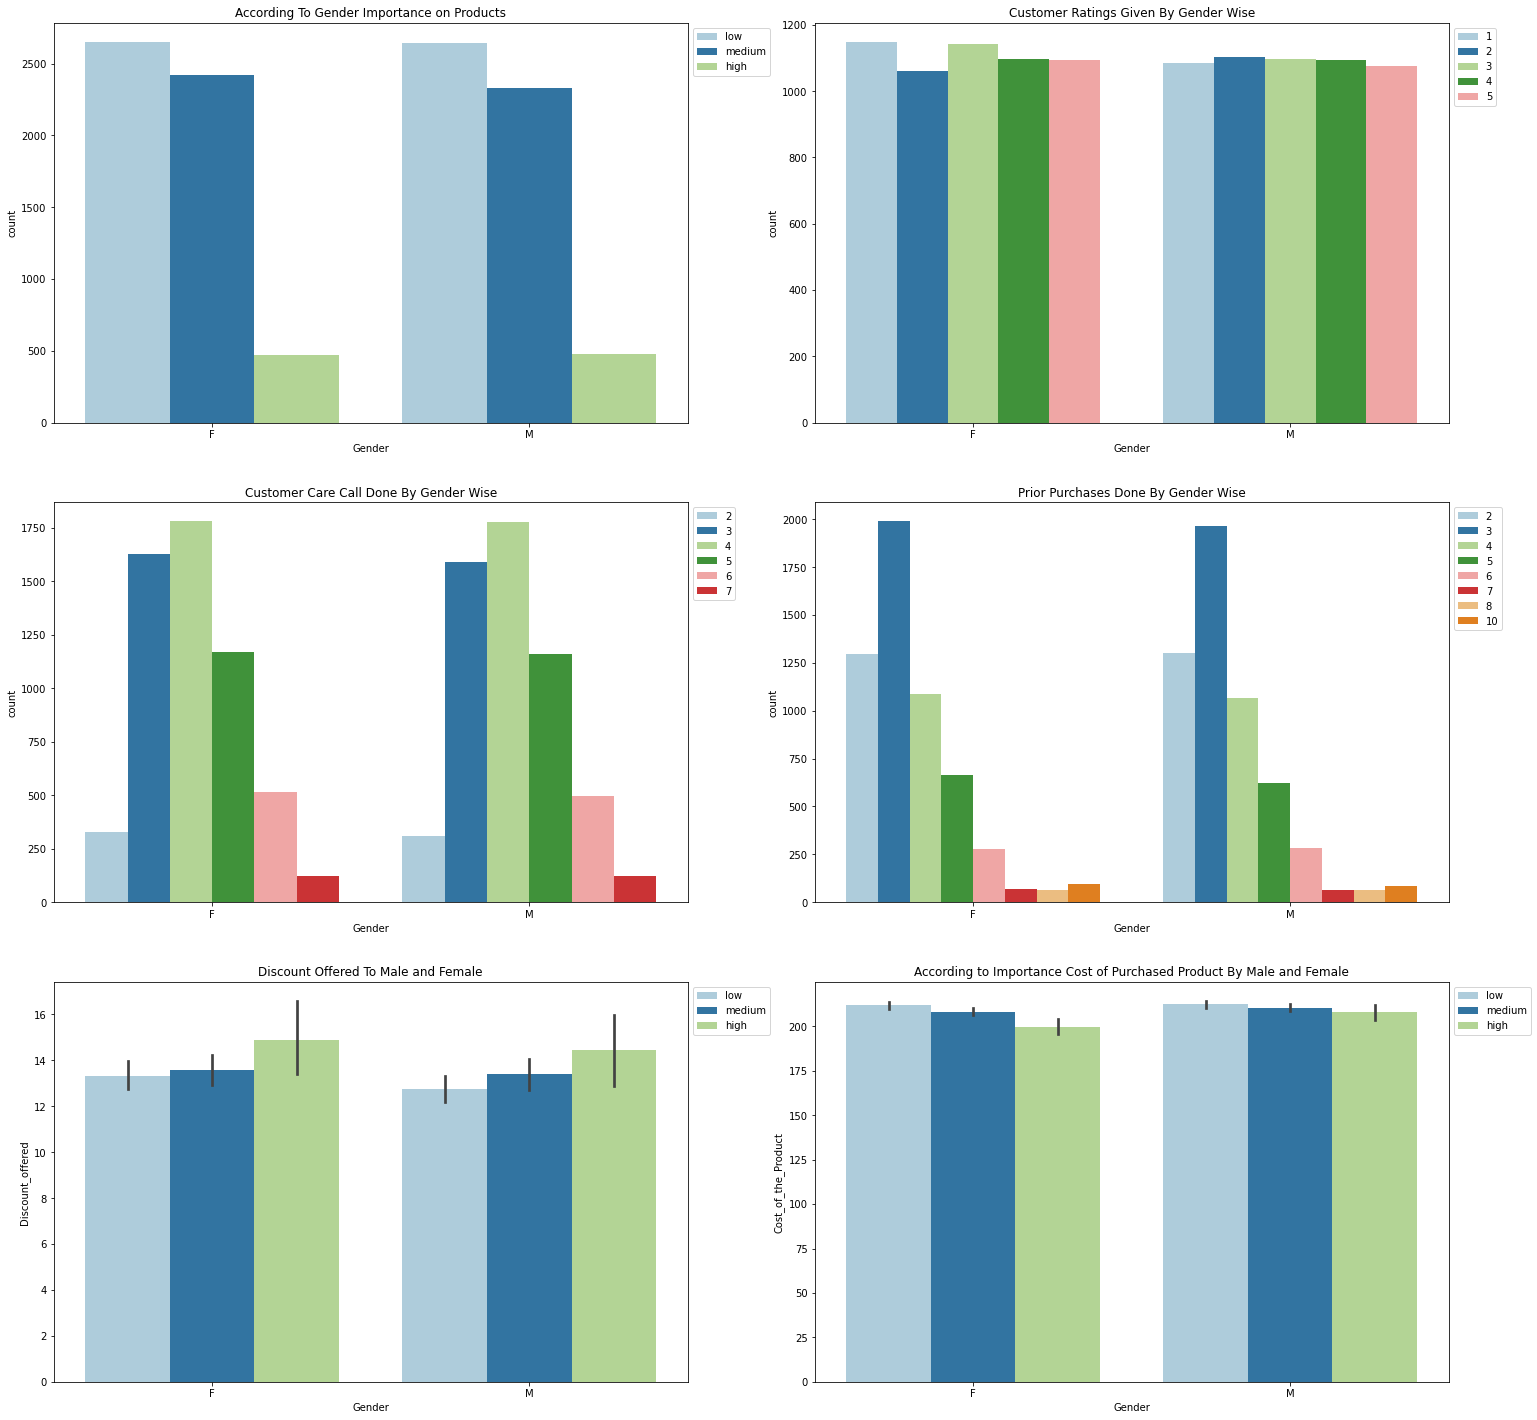

In [21]:
fig,ax = plt.subplots(3,2, figsize=(25,25))  # 'ax' has references to all the four axes

c1 = sns.countplot(x = 'Gender', data = df, hue = 'Product_importance', palette = 'Paired', ax = ax[0,0])
c1.set_title('According To Gender Importance on Products')
c1.legend(bbox_to_anchor = (1, 1), loc = 2)

c2 = sns.countplot(x = 'Gender', data = df, hue = 'Customer_rating', palette = 'Paired', ax = ax[0,1])
c2.set_title('Customer Ratings Given By Gender Wise')
c2.legend(bbox_to_anchor = (1, 1), loc = 2)

c3 = sns.countplot(x = 'Gender', data = df, hue = 'Customer_care_calls', palette = 'Paired', ax = ax[1,0])
c3.set_title('Customer Care Call Done By Gender Wise')
c3.legend(bbox_to_anchor = (1, 1), loc = 2)

c4 = sns.countplot(x = 'Gender', data = df, hue = 'Prior_purchases', palette = 'Paired', ax = ax[1,1])
c4.set_title('Prior Purchases Done By Gender Wise')
c4.legend(bbox_to_anchor = (1, 1), loc = 2)

b1 = sns.barplot(x = 'Gender', y = 'Discount_offered', data = df, hue = 'Product_importance', palette = 'Paired', ax = ax[2,0])
b1.set_title('Discount Offered To Male and Female')
b1.legend(bbox_to_anchor = (1, 1), loc = 'upper left')

b2 = sns.barplot(x = 'Gender', y = 'Cost_of_the_Product', data = df, hue = 'Product_importance', palette = 'Paired', ax = ax[2,1])
b2.set_title('According to Importance Cost of Purchased Product By Male and Female')
b2.legend(bbox_to_anchor = (1, 1), loc = 2)

plt.show()

+ From above chart we can see Female is getting more disscount than Male. Gender wise there is no too much on product importance. From above chart we can see that gender wise both have given near about same ratings.

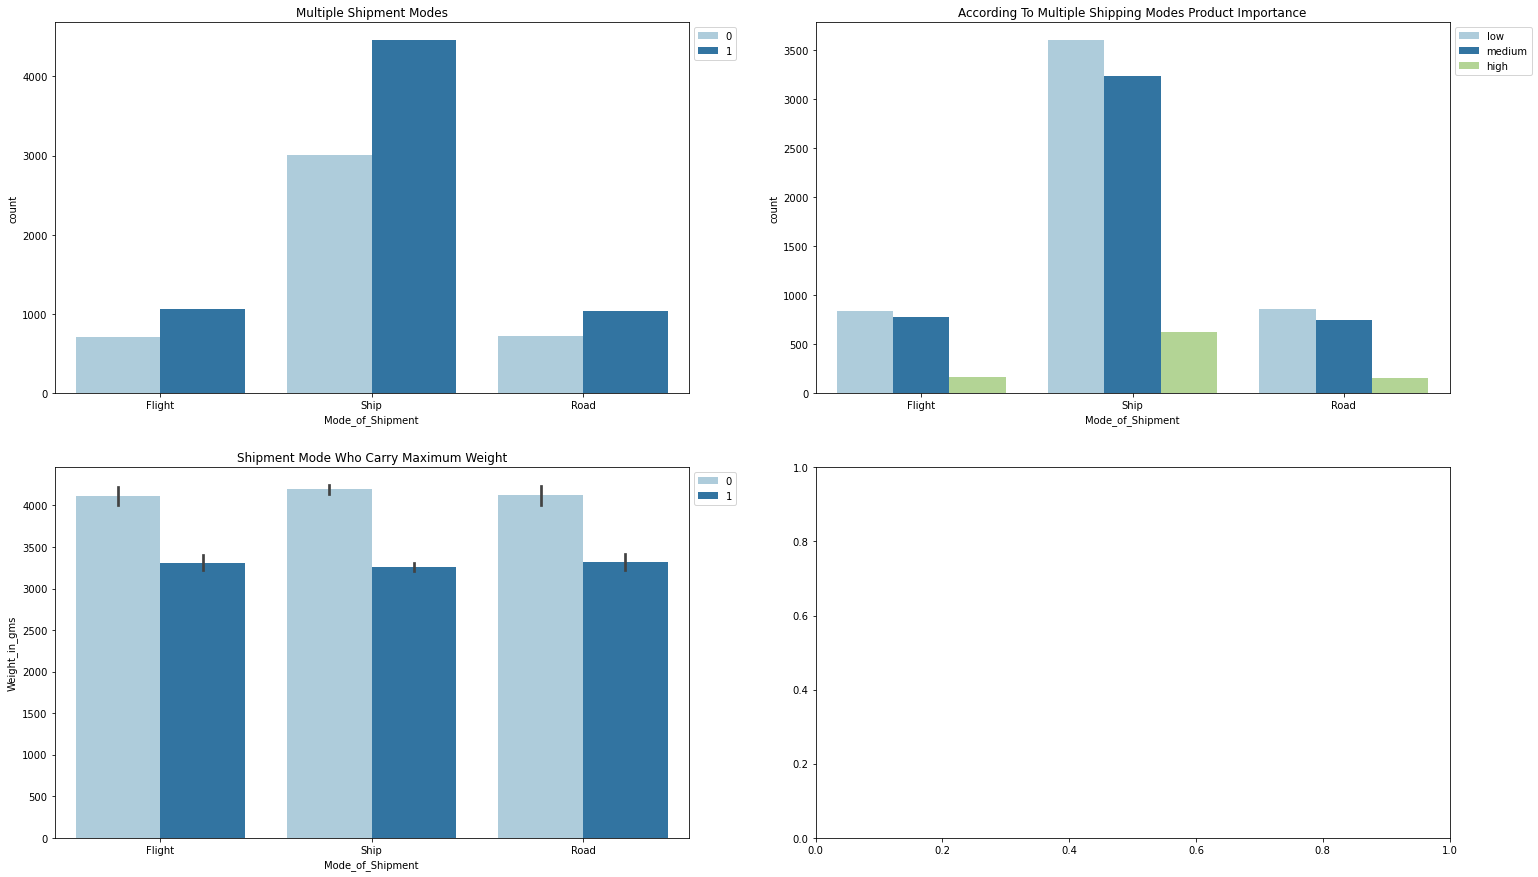

In [22]:
fig,ax = plt.subplots(2,2, figsize=(25,15))  # 'ax' has references to all the four axes

c1 = sns.countplot(x = 'Mode_of_Shipment', data = df, hue = 'Reached.on.Time_Y.N', palette = 'Paired', ax = ax[0,0])
c1.legend(bbox_to_anchor = (1, 1), loc = 2)
c1.set_title('Multiple Shipment Modes')

c2 = sns.countplot(x = 'Mode_of_Shipment', data = df, hue = 'Product_importance', palette = 'Paired', ax = ax[0,1])
c2.legend(bbox_to_anchor = (1, 1), loc = 2)
c2.set_title('According To Multiple Shipping Modes Product Importance')

b1 = sns.barplot(x = 'Mode_of_Shipment', y = 'Weight_in_gms', data = df, hue = 'Reached.on.Time_Y.N', palette = 'Paired', ax = ax[1,0])
b1.legend(bbox_to_anchor = (1, 1), loc = 2)
b1.set_title('Shipment Mode Who Carry Maximum Weight')

plt.show()

+ From above charts we can ses most of the time company used Ship for shipping products. There are three modes of shimpment. We can seet that all modes carry same weight of product.

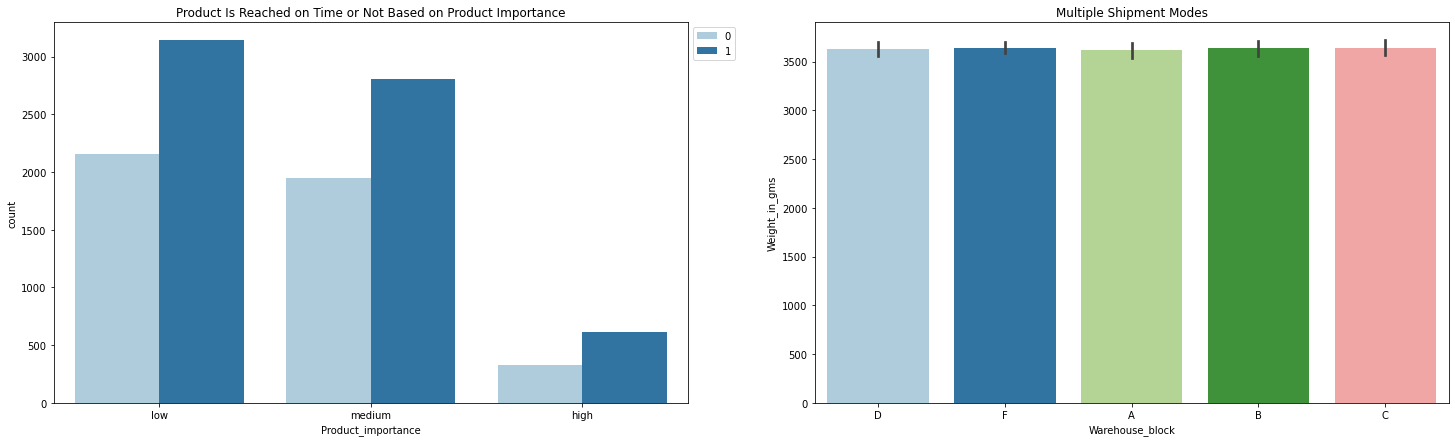

In [23]:
fig,ax = plt.subplots(1,2, figsize=(25,7))  # 'ax' has references to all the four axes

c = sns.countplot(x = 'Product_importance', data = df, hue = 'Reached.on.Time_Y.N', palette = 'Paired', ax = ax[0])
c.legend(bbox_to_anchor = (1, 1), loc = 2)
c.set_title('Product Is Reached on Time or Not Based on Product Importance')

b = sns.barplot(x = 'Warehouse_block', y = 'Weight_in_gms', data = df, palette = 'Paired', ax = ax[1])
#b.legend(bbox_to_anchor = (1, 1), loc = 2)
b.set_title('Multiple Shipment Modes')

plt.show()

+ From above charts we can see that low important of product is reaching on time rather than medium and high. It is happening for not reaching on time.

### Seaborn Distplot

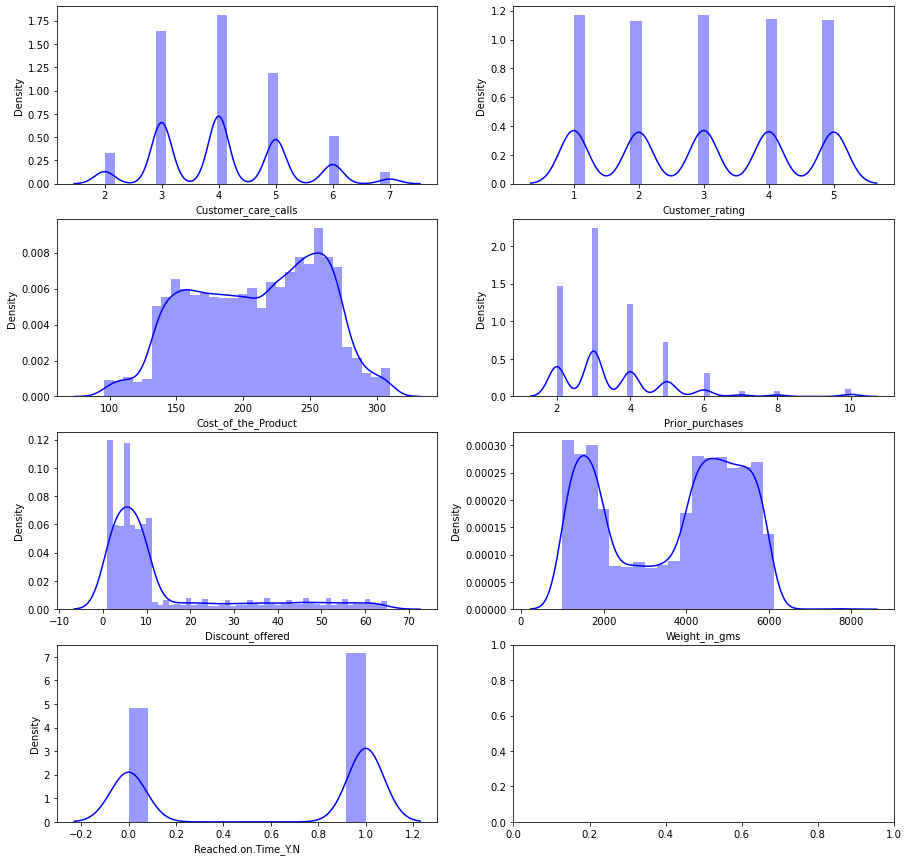

In [24]:
fig,ax = plt.subplots(4,2, figsize=(15,15))  # 'ax' has references to all the four axes
sns.distplot(df['Customer_care_calls'], ax = ax[0,0], color = 'b') 
sns.distplot(df['Customer_rating'], ax = ax[0,1], color = 'b')
sns.distplot(df['Cost_of_the_Product'], ax = ax[1,0], color = 'b') 
sns.distplot(df['Prior_purchases'], ax = ax[1,1], color = 'b')
sns.distplot(df['Discount_offered'], ax = ax[2,0], color = 'b')
sns.distplot(df['Weight_in_gms'], ax = ax[2,1], color = 'b')
sns.distplot(df['Reached.on.Time_Y.N'], ax = ax[3,0], color = 'b')

plt.show()

+ With the help of dist plot we can get a rough idea on distribution of each numerical features. A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it. Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. This article deals with the distribution plots in seaborn which is used for examining univariate and bivariate distributions.

### Seaborn Violinlot

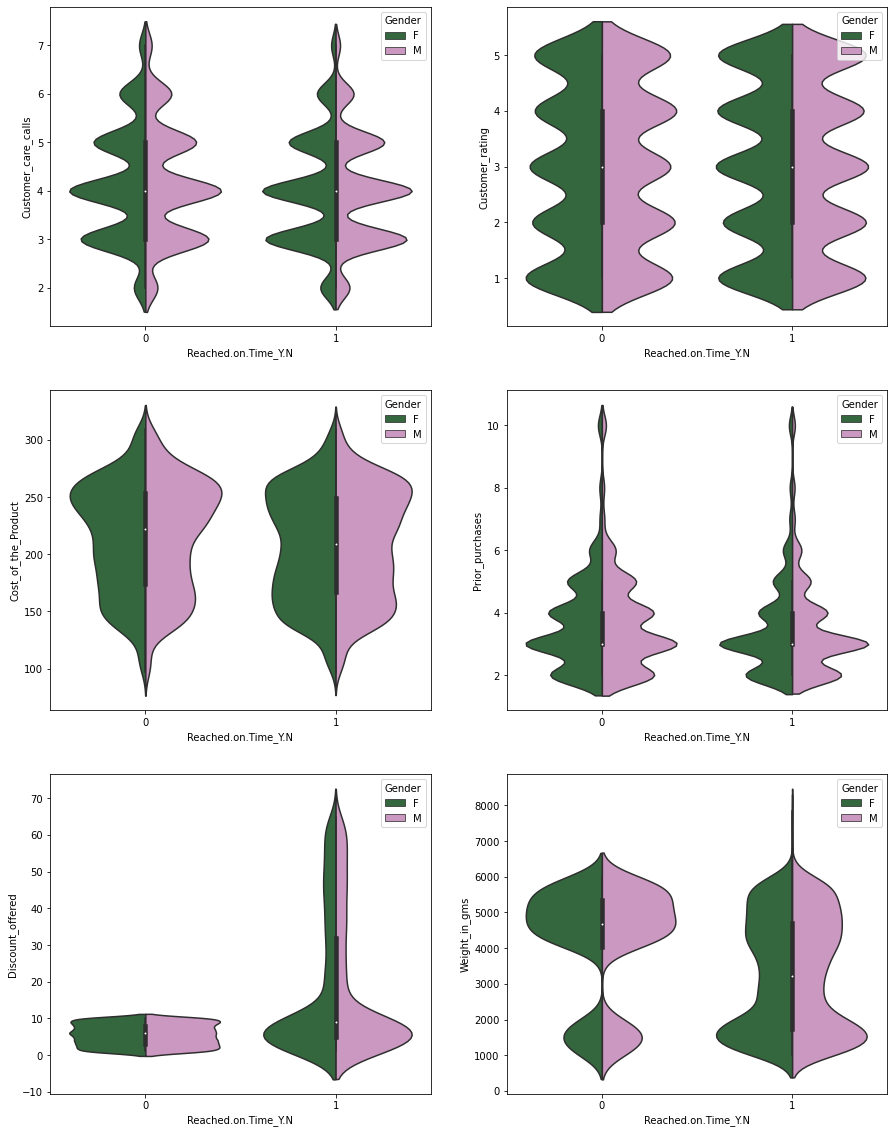

In [25]:
fig,ax = plt.subplots(3,2, figsize=(15,20))  # 'ax' has references to all the four axes
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Customer_care_calls', hue = 'Gender', data = df, split = True, palette = 'cubehelix', ax = ax[0,0]) 
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Customer_rating', hue = 'Gender', data = df, split = True, palette = 'cubehelix', ax = ax[0,1])
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Cost_of_the_Product', hue = 'Gender', data = df, split = True, palette = 'cubehelix', ax = ax[1,0]) 
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Prior_purchases', hue = 'Gender', data = df, split = True, palette = 'cubehelix', ax = ax[1,1])
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered', hue = 'Gender', data = df, split = True, palette = 'cubehelix', ax = ax[2,0])
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms', hue = 'Gender', data = df, split = True, palette = 'cubehelix', ax = ax[2,1])

plt.show()

+ A violin plot plays a similar activity that is pursued through whisker or box plot do. As it shows several quantitative data across one or more categorical variables. It can be an effective and attractive way to show multiple data at several units. A “wide-form” Data Frame helps to maintain each numeric column which can be plotted on the graph. It is possible to use NumPy or Python objects, but pandas objects are preferable because the associated names will be used to annotate the axes.

### Seaborn Pairplot

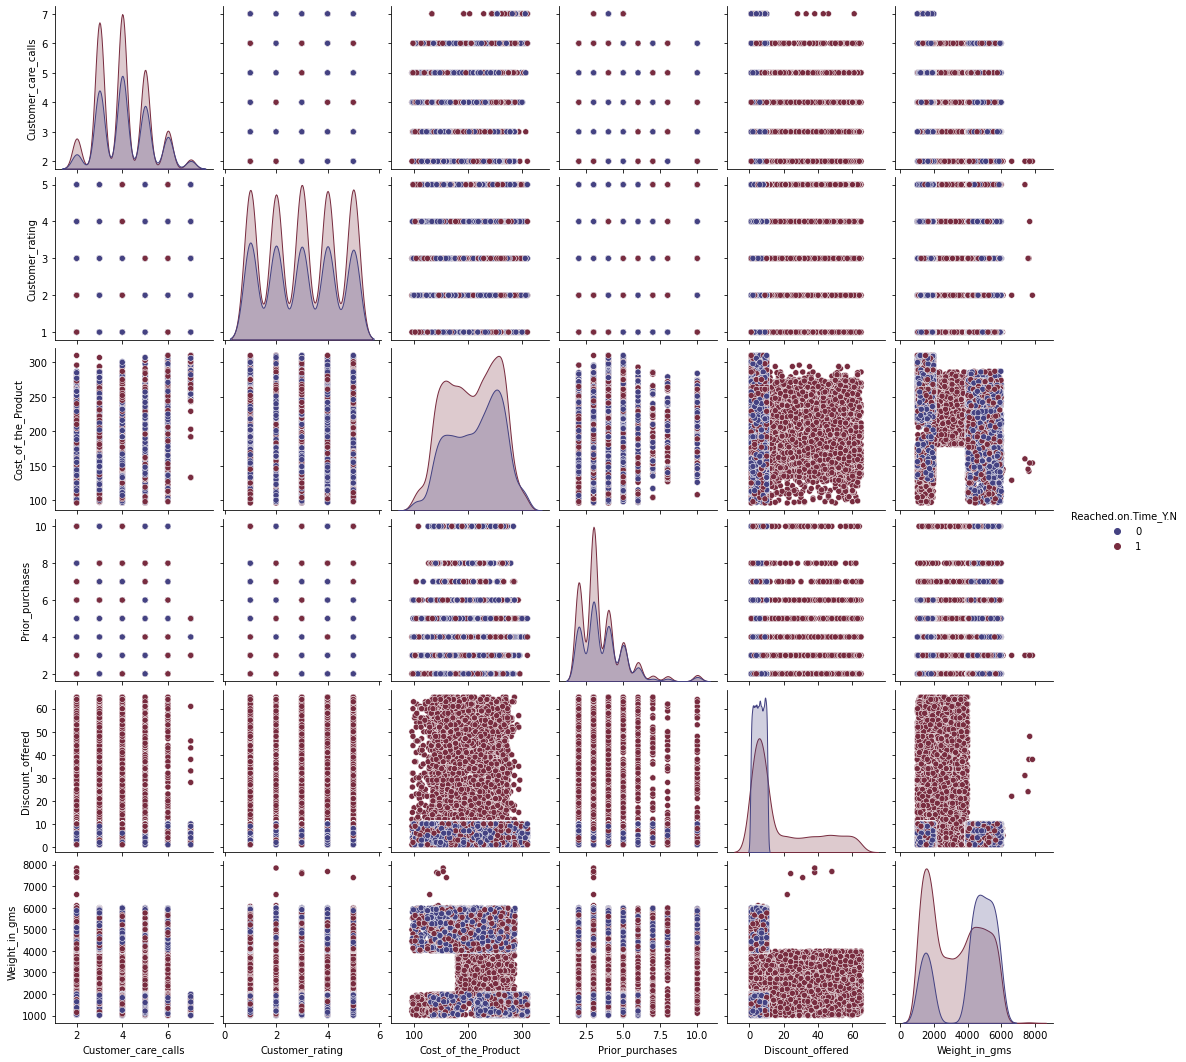

In [26]:
sns.pairplot(df, hue = 'Reached.on.Time_Y.N', palette = 'icefire');
plt.show()

+ To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots. Data Visualization is the presentation of data in pictorial format. It is extremely important for Data Analysis, primarily because of the fantastic ecosystem of data-centric Python packages. And it helps to understand the data, however, complex it is, the significance of data by summarizing and presenting a huge amount of data in a simple and easy-to-understand format and helps communicate information clearly and effectively.

### Seaborn Heatmap

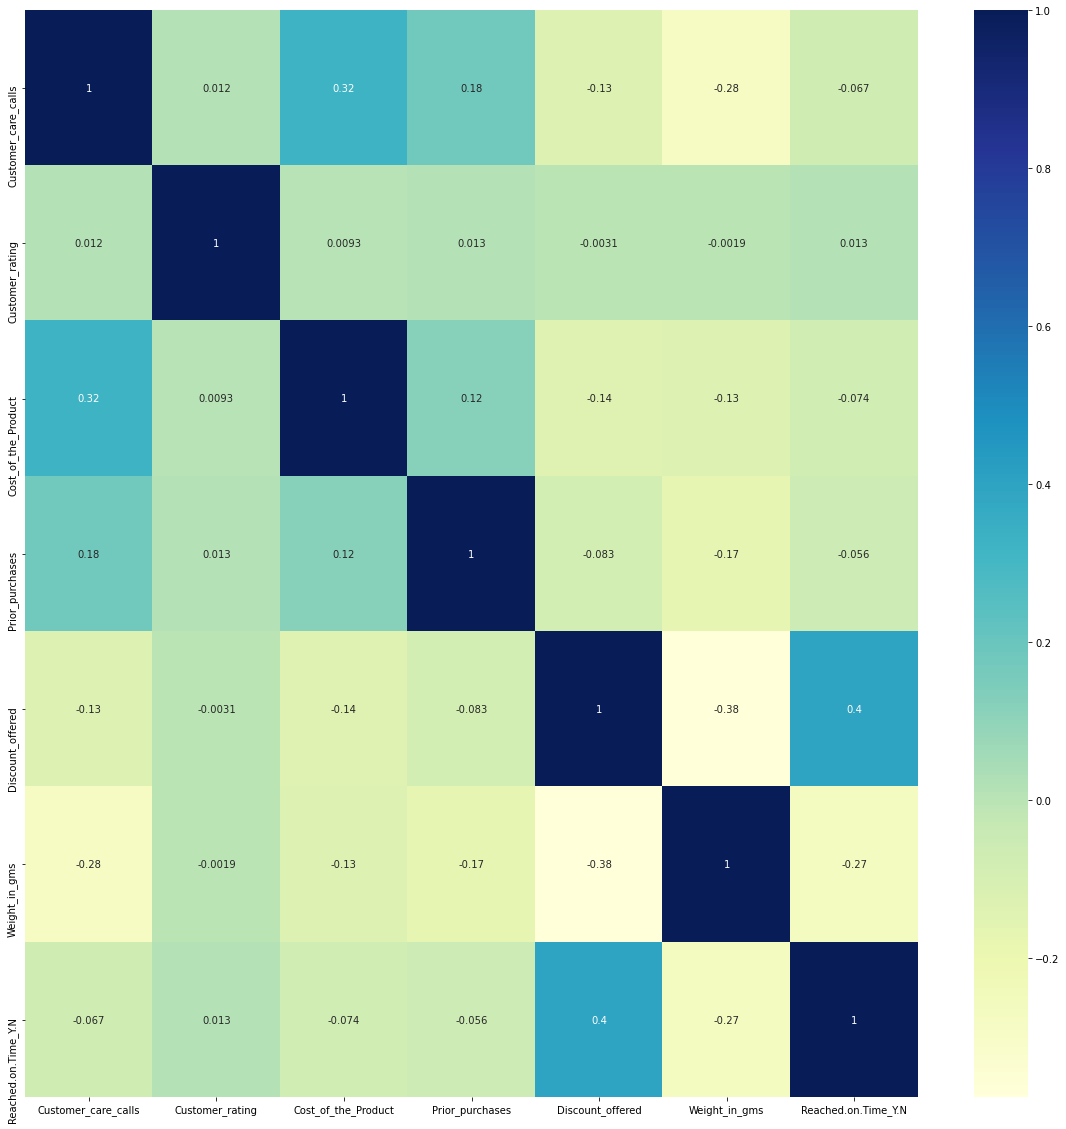

In [27]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
#plot heat map
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="YlGnBu")

+ Here, I performed the correlation analysis for all the numerical features including qualitative and quantitative features. From the above correlation plot, I found there were several features have strong positive correlation relationships. The strongest positive correlation relationship is between the "Discount_offered" and "Reached.on.Time_Y.N", which means that a higher if Discount_offered increase then chance of Reached.on.Time_Y.N will also be increased. Apart from that there are some other features which are highly correlated which are "Cost_of_the_Product", "Customer_care_calls" and "Prior_purchases", "Customer_care_calls".

### Seaborn Boxplot

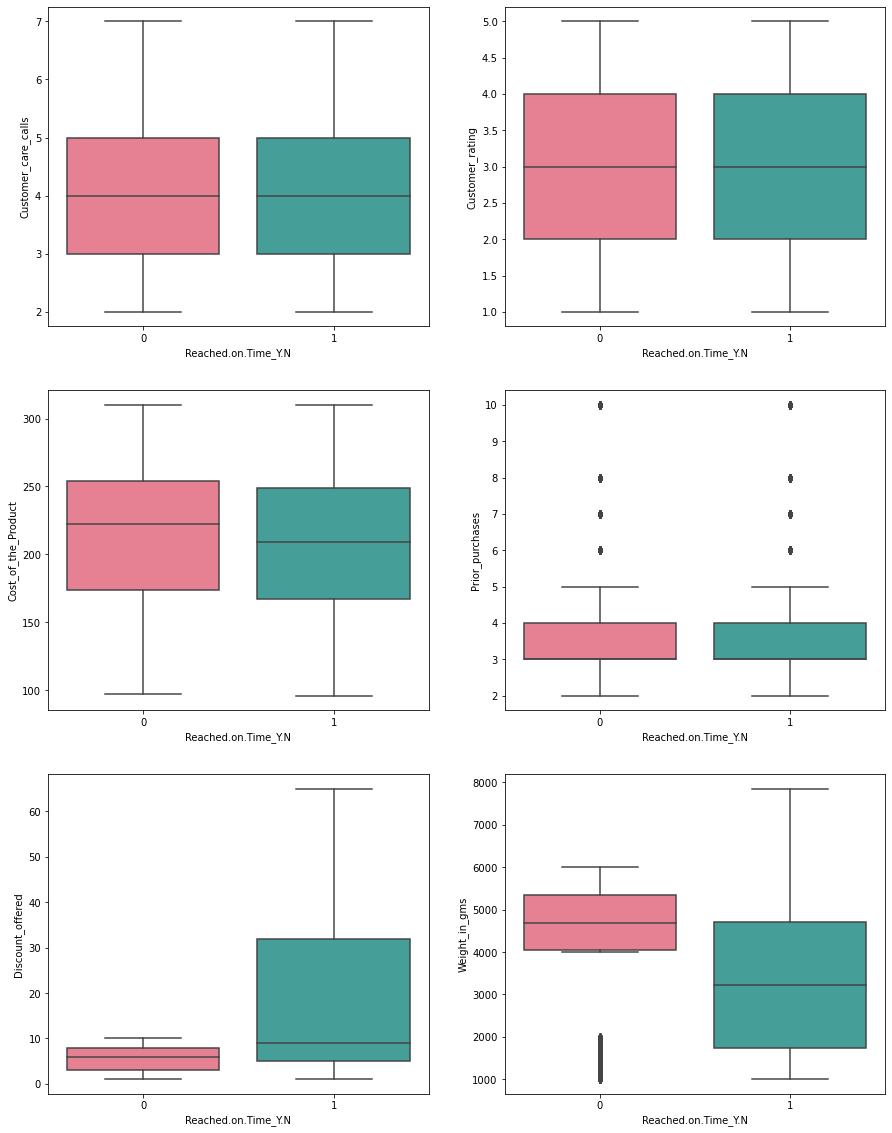

In [28]:
fig,ax = plt.subplots(3,2, figsize=(15,20))  # 'ax' has references to all the four axes
sns.boxplot(x = df['Reached.on.Time_Y.N'], y = df['Customer_care_calls'], palette = 'husl', ax = ax[0,0]) 
sns.boxplot(x = df['Reached.on.Time_Y.N'], y = df['Customer_rating'], palette = 'husl', ax = ax[0,1])
sns.boxplot(x = df['Reached.on.Time_Y.N'], y = df['Cost_of_the_Product'], palette = 'husl', ax = ax[1,0]) 
sns.boxplot(x = df['Reached.on.Time_Y.N'], y = df['Prior_purchases'], palette = 'husl', ax = ax[1,1])
sns.boxplot(x = df['Reached.on.Time_Y.N'], y = df['Discount_offered'], palette = 'husl', ax = ax[2,0])
sns.boxplot(x = df['Reached.on.Time_Y.N'], y = df['Weight_in_gms'], palette = 'husl', ax = ax[2,1])

plt.show()

+ From boxplot we can understand that if someone got discount then chance for reaching the product to that customer on time is very high. Weight of the product is not a problem to reach to the customer on time.

## Feature Engineering

In [29]:
# Here, I applied different types of encoding.

def encoding(data, feature):
    
    data = data.copy()
    
    # One-Hot Encoding
    dummies = pd.get_dummies(data[feature], prefix = feature)
    data = pd.concat([data, dummies], axis = 1)
    data = data.drop(feature, axis = 1)
    
    #Binary Encoding
    data['Gender'] = data['Gender'].replace({'F' : 0, 'M' : 1})
    
    #Lebel Encoding
    lebels = {'low' : 1, 'medium' : 2, 'high' : 3}
    data['Product_importance_lebels'] = data['Product_importance'].map(lebels)
    data = data.drop(columns = 'Product_importance', axis = 1)
    
    return data

df1 = encoding(df, ['Warehouse_block', 'Mode_of_Shipment'])

In [30]:
# Here, I splitted the dataset into 75% of training and 25% of testing. I applied "Satandard Scaler" for scalling the data.

def feature_scalling(data):
    #Split data into x and y
    x = data.drop('Reached.on.Time_Y.N', axis = 1)
    y = data['Reached.on.Time_Y.N']
    
    #Applying Train-Test-Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, shuffle = True, random_state = 1)
    
    #Appling Standard Scalling
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = pd.DataFrame(scaler.fit_transform(x_train), index = x_train.index, columns = x_train.columns)
    x_test = pd.DataFrame(scaler.fit_transform(x_test), index = x_test.index, columns = x_test.columns)
    
    return x_train, x_test, y_train, y_test

In [31]:
X_train, X_test, Y_train, Y_test = feature_scalling(df1)

## Machine Learning Models

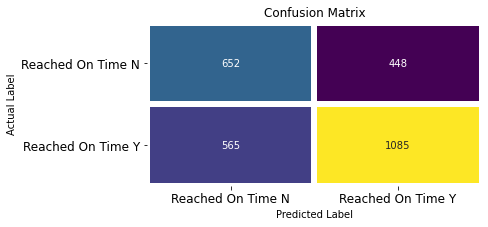

-------------------------------------------
Accuracy of Logistic Regression: 63.163636363636364 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.59      0.56      1100
           1       0.71      0.66      0.68      1650

    accuracy                           0.63      2750
   macro avg       0.62      0.63      0.62      2750
weighted avg       0.64      0.63      0.63      2750



In [32]:
# Here, I applied "Logistic Regression" and found "Confusion Matrix, Accuracy Score, Classification Report".

model_lgr = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, Y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(Y_test, lr_predict)
lr_acc_score = accuracy_score(Y_test, lr_predict)

df1 = pd.DataFrame(columns=["Reached On Time N","Reached On Time Y"], index= ["Reached On Time N","Reached On Time Y"], data= lr_conf_matrix )
f,ax = plt.subplots(figsize=(6,3))
sns.heatmap(df1, annot=True,cmap="viridis", fmt= '.0f',linewidths = 5,ax=ax, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Actual Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(Y_test,lr_predict))

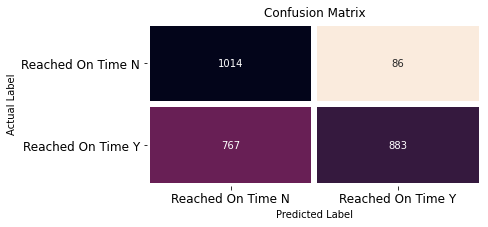

-------------------------------------------
Accuracy of Random Forest: 68.98181818181818 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.92      0.70      1100
           1       0.91      0.54      0.67      1650

    accuracy                           0.69      2750
   macro avg       0.74      0.73      0.69      2750
weighted avg       0.77      0.69      0.69      2750



In [33]:
# Here, I applied "Random Forest Classifier" and found "Confusion Matrix, Accuracy Score, classification_report".

model_rfc = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=10, random_state=101,max_depth=5)
rf.fit(X_train,Y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(Y_test, rf_predicted)
rf_acc_score = accuracy_score(Y_test, rf_predicted)

df1 = pd.DataFrame(columns=["Reached On Time N","Reached On Time Y"], index= ["Reached On Time N","Reached On Time Y"], data= rf_conf_matrix )
f,ax = plt.subplots(figsize=(6,3))
sns.heatmap(df1, annot=True,cmap="rocket_r", fmt= '.0f',linewidths = 5,ax=ax, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Actual Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(Y_test,rf_predicted))

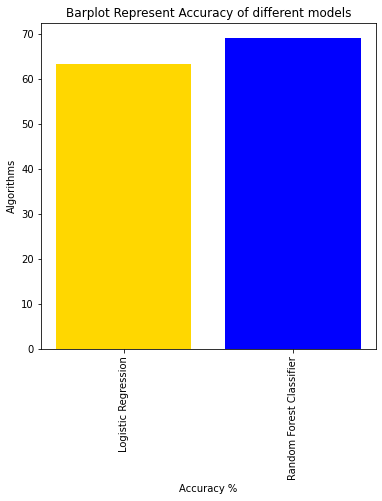

In [34]:
# Here, I have created a barplot on accuracy score for each models.

model_ev = {'Model' : ['Logistic Regression', 'Random Forest Classifier'], 
            'Accuracy' : [lr_acc_score*100, rf_acc_score*100]}
colors = ['gold', 'blue', 'cyan']
plt.figure(figsize = (6, 6))
plt.title("Barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.xticks(rotation = 90)
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'], model_ev['Accuracy'], color = colors)
plt.show()

##### This is a balanced data set on which I performed prediction that's we can trust on accuracy. Here, I applied two algorithms but they are not providing higher accuracy and f1-score. According to me I think I have to apply another machine learning models through which I can get higher accuracy and f1-score. 
#####    The "Random Forest Classifier" works quite well even with the default parameters. That’s the one reason why I have chosen  "Random Forest Classifier" for this problem. Though this can be improved by tuning 'hyper parameters'. "Random Forest Classifier" also doesn’t get over fit  easily because of its randomness feature. One of the best feature "Random Forest Classifier"  has that is it provides the importance on features in the model. My second reason for choosing it is that it provided me higher accuracy and f1-score to predict the product will reach on time or not than "Logistic Regression".